# TIME SERIES

In [1]:
#About the data:-

#We only have one day data in the year 2009.
#As said in data description The file contains company's last 8 years of stock details and investment details..
#In between many days data are missing

# Doubts:-

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Company Stock and Investment.csv')

In [4]:
df.head(30)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
5,08-01-2010,0.001269,-0.013097,0.006648,0.027077
6,11-01-2010,-0.002417,0.023297,-0.008822,-0.024041
7,12-01-2010,-0.021202,-0.001518,-0.011375,-0.022715
8,13-01-2010,-0.013987,-0.020847,0.014106,0.013820
9,14-01-2010,-0.003892,0.009758,-0.005792,-0.013632


In [5]:
df=df[["Date","Oil Investments"]]
df.head()

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256


# No repeated values ,  i.e No white noise in data.
# We can proceed with time series analysis.

In [6]:
df['Date'].nunique() 

1984

In [7]:
df.shape

(1984, 2)

In [8]:
(8*365)-(df.shape[0])
#7years * 365 - no.of data in dataset= no. of missing days data  

936

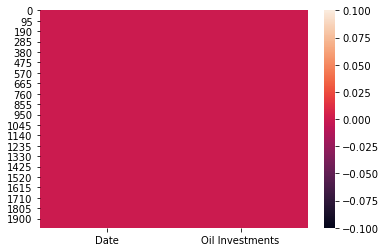

In [9]:
import seaborn as sns
sns.heatmap(df.isnull())

In [10]:
df['Date'].dtypes

dtype('O')

In [11]:
df.shape

(1984, 2)

In [12]:
df.tail(30)

,Date,Oil Investments
1954,05-10-2017,0.015800
1955,06-10-2017,-0.028549
1956,09-10-2017,0.004864
1957,10-10-2017,0.027229
1958,11-10-2017,0.007265
1959,12-10-2017,-0.013450
1960,13-10-2017,0.016202
1961,16-10-2017,0.008361
1962,17-10-2017,0.000193
1963,18-10-2017,0.003470


In [13]:
# Convert 'Date' into Datetime
df['Date']=pd.to_datetime(df['Date'])


In [14]:
df.head(20)

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256
5,2010-08-01,0.001269
6,2010-11-01,-0.002417
7,2010-12-01,-0.021202
8,2010-01-13,-0.013987
9,2010-01-14,-0.003892


In [15]:
df.tail()

,Date,Oil Investments
1979,2017-09-11,0.005984
1980,2017-10-11,-0.007173
1981,2017-11-13,0.000352
1982,2017-11-14,-0.019376
1983,2017-11-15,-0.007006


In [16]:
df['Date'].dtypes

dtype('<M8[ns]')

In [17]:
df.set_index('Date',inplace=True)

In [18]:
df.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [19]:
df.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


## Step 2: Visualize the Data

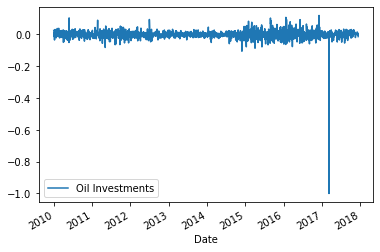

In [20]:
df.plot()

# Selecting the model after visualization above

###### In above plot data looks non-seasonal /  irregular .

   Usually in seasonal data we use SARIMAX.
           in irregular(non-seasonal) we use ARIMAX.
           
   Here we will implement ARIMAX as our data looks non-seasonal /  irregular.
   Before that,Now

###### we will check if data is STATIONARY or not.

# Here we will implement ARIMAX as our data looks non-seasonal /  irregular

# Testing For Stationarity

In [21]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [22]:
test_result=adfuller(df['Oil Investments']) # adfuller give us 5 values

In [23]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-45.94216292983992, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


### Most important value is p-value above(2nd value(0.0))

# Ho(null hypothesis): time series is non-stationary          
# H1(altenative): time series is stationary

# Step-1.Rolling/Addfuller

In [24]:
#Ho: It is non stationary
#H1: It is stationary
#considered 0.05 in general.

def adfuller_test(sales):
    result=adfuller(sales) 
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [25]:
adfuller_test(df['Oil Investments']) #call the function

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary


## Auto Regressive Model(AR)--Just for visualization
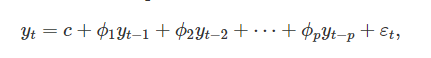

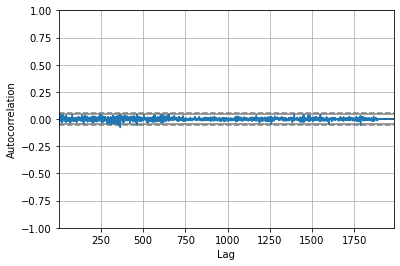

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Oil Investments']) 
plt.show()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

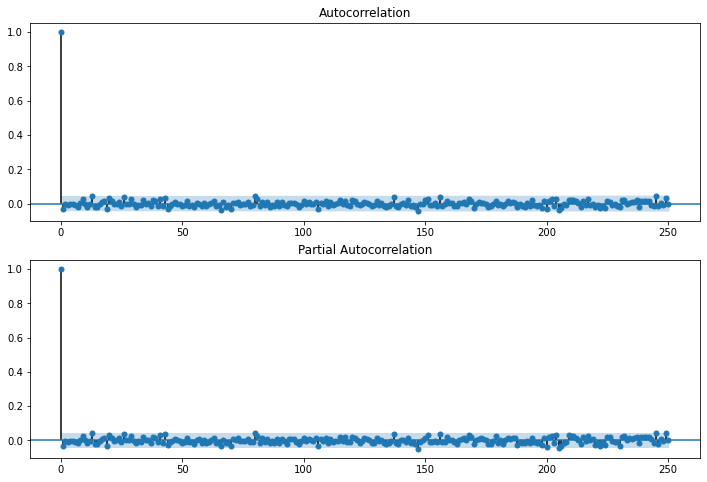

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df['Oil Investments'],lags=250,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Oil Investments'],lags=250,ax=ax2)

# Model Building-->Arima model Implementation

In [29]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA

In [30]:
model=ARIMA(df['Oil Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
results=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

# why this warning above?

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4081.135
Method:                       css-mle   S.D. of innovations              0.031
Date:                Wed, 14 Oct 2020   AIC                          -8154.269
Time:                        09:28:15   BIC                          -8131.900
Sample:                             1   HQIC                         -8146.052
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.541e-06   1.17e-06     -1.315      0.189   -3.84e-06    7.57e-07
ar.L1.D.Oil Investments    -0.0317      0.022     -1.413      0.158      -0.076       0.012
ma.L1.D.Oil Investments    -1.0000      0.001   -736.297      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -31.5380           +0.0000j           31.5380            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [32]:
df.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


# Predicting on training data & visualizing

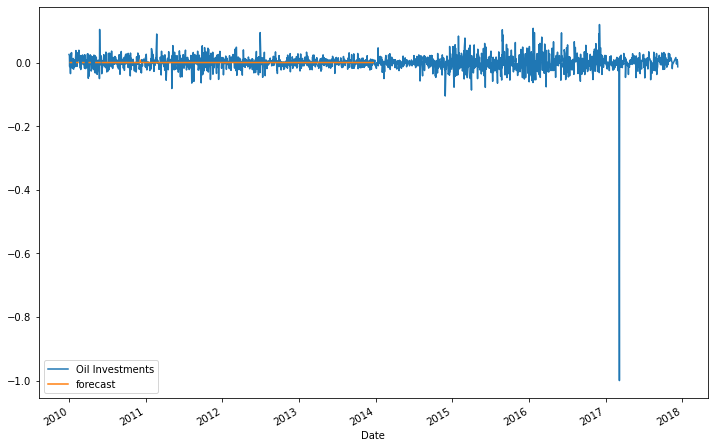

In [33]:
#predicted value will be imputed in the respective row and remaining rows value will be nan.

df['forecast']=results.predict(start=90,end=1000,dynamic=True)

df[['Oil Investments','forecast']].plot(figsize=(12,8))

In [34]:
#Flat line.Bcaz The predicted value are very close to zero.See below
#Can we add a constant and then take log method???????????????????????

In [35]:
df[85:100]

,Oil Investments,forecast
Date,,
2010-05-05,-0.032999,NaN
2010-06-05,-0.035250,NaN
2010-07-05,-0.026950,NaN
2010-10-05,0.023835,NaN
2010-11-05,-0.006763,NaN
2010-12-05,-0.009428,0.007087
2010-05-13,-0.016788,-0.000226
2010-05-14,-0.037241,0.000006
2010-05-17,-0.021366,-0.000002


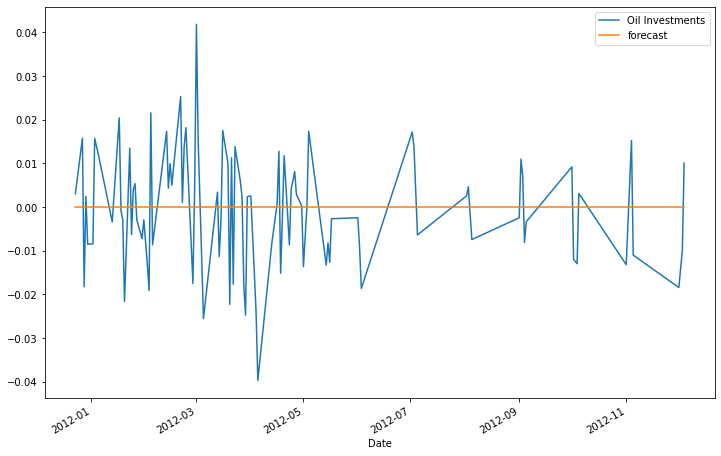

In [36]:
df[['Oil Investments','forecast']][500:600].plot(figsize=(12,8))

In [37]:
df[85:95]

,Oil Investments,forecast
Date,,
2010-05-05,-0.032999,NaN
2010-06-05,-0.035250,NaN
2010-07-05,-0.026950,NaN
2010-10-05,0.023835,NaN
2010-11-05,-0.006763,NaN
2010-12-05,-0.009428,0.007087
2010-05-13,-0.016788,-0.000226
2010-05-14,-0.037241,0.000006
2010-05-17,-0.021366,-0.000002


In [38]:
df[995:1005]

,Oil Investments,forecast
Date,,
2013-12-13,-0.009670,-0.000002
2013-12-16,0.009453,-0.000002
2013-12-17,-0.001955,-0.000002
2013-12-18,0.006186,-0.000002
2013-12-19,0.008300,-0.000002
2013-12-20,0.007215,-0.000002
2013-12-23,-0.004944,NaN
2013-12-24,0.002535,NaN
2013-12-26,0.003135,NaN


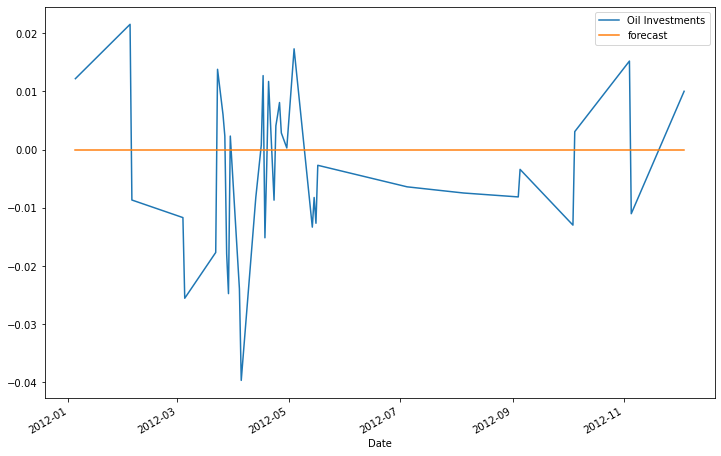

In [39]:
df[['Oil Investments','forecast']][560:600].plot(figsize=(12,8))

blue is actual and orange line is predict
Orange line is almost '0'.this is not a good sign for our model performance.

In [40]:
df['forecast'].describe()

count    911.000000
mean       0.000006
std        0.000235
min       -0.000226
25%       -0.000002
50%       -0.000002
75%       -0.000002
max        0.007087
Name: forecast, dtype: float64

# creating new data for 2018,2019,2020 to predict future of this.

In [41]:
#creating some data to predict future of this.
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,1095)]#1095=3 years(2018,2019,2020)*365(no.of days in a year)
#                                   columns=x exchanged to days as we need data in days

#DateOffset-->Standard kind of date increment used for a date range.check examples by shift + tab

In [42]:
len(future_dates)

1095

In [43]:
future_dates

[Timestamp('2017-11-15 00:00:00'),
 Timestamp('2017-11-16 00:00:00'),
 Timestamp('2017-11-17 00:00:00'),
 Timestamp('2017-11-18 00:00:00'),
 Timestamp('2017-11-19 00:00:00'),
 Timestamp('2017-11-20 00:00:00'),
 Timestamp('2017-11-21 00:00:00'),
 Timestamp('2017-11-22 00:00:00'),
 Timestamp('2017-11-23 00:00:00'),
 Timestamp('2017-11-24 00:00:00'),
 Timestamp('2017-11-25 00:00:00'),
 Timestamp('2017-11-26 00:00:00'),
 Timestamp('2017-11-27 00:00:00'),
 Timestamp('2017-11-28 00:00:00'),
 Timestamp('2017-11-29 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2017-12-02 00:00:00'),
 Timestamp('2017-12-03 00:00:00'),
 Timestamp('2017-12-04 00:00:00'),
 Timestamp('2017-12-05 00:00:00'),
 Timestamp('2017-12-06 00:00:00'),
 Timestamp('2017-12-07 00:00:00'),
 Timestamp('2017-12-08 00:00:00'),
 Timestamp('2017-12-09 00:00:00'),
 Timestamp('2017-12-10 00:00:00'),
 Timestamp('2017-12-11 00:00:00'),
 Timestamp('2017-12-12 00:00:00'),
 Timestamp('2017-12-

In [44]:
#creating new dataframe from new data created above as index and all data will be automatically NAN.

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
#                                               skipping the 1st row of future_dates list above as we want dates after that row.

In [45]:
future_datest_df.head(30)

,Oil Investments,forecast
2017-11-16,NaN,NaN
2017-11-17,NaN,NaN
2017-11-18,NaN,NaN
2017-11-19,NaN,NaN
2017-11-20,NaN,NaN
2017-11-21,NaN,NaN
2017-11-22,NaN,NaN
2017-11-23,NaN,NaN
2017-11-24,NaN,NaN
2017-11-25,NaN,NaN


In [46]:
future_datest_df.tail()#we can see our last row index is 2020-11-13,sucessfully created new nan dataset for 2018,2019,2020.

,Oil Investments,forecast
2020-11-09,NaN,NaN
2020-11-10,NaN,NaN
2020-11-11,NaN,NaN
2020-11-12,NaN,NaN
2020-11-13,NaN,NaN


In [47]:
future_datest_df.describe()

,Oil Investments,forecast
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


# Concating both original and created dataframes row wise

In [48]:
future_df=pd.concat([df,future_datest_df])
future_df.head()

,Oil Investments,forecast
2009-12-31,0.025417,NaN
2010-04-01,0.026830,NaN
2010-05-01,0.002699,NaN
2010-06-01,0.021688,NaN
2010-07-01,-0.006256,NaN


In [49]:
future_df.tail(20)

,Oil Investments,forecast
2020-10-25,NaN,NaN
2020-10-26,NaN,NaN
2020-10-27,NaN,NaN
2020-10-28,NaN,NaN
2020-10-29,NaN,NaN
2020-10-30,NaN,NaN
2020-10-31,NaN,NaN
2020-11-01,NaN,NaN
2020-11-02,NaN,NaN
2020-11-03,NaN,NaN


In [50]:
future_df[85:95]

,Oil Investments,forecast
2010-05-05,-0.032999,NaN
2010-06-05,-0.035250,NaN
2010-07-05,-0.026950,NaN
2010-10-05,0.023835,NaN
2010-11-05,-0.006763,NaN
2010-12-05,-0.009428,0.007087
2010-05-13,-0.016788,-0.000226
2010-05-14,-0.037241,0.000006
2010-05-17,-0.021366,-0.000002
2010-05-18,-0.009989,-0.000002


In [51]:
future_df[995:1005]

,Oil Investments,forecast
2013-12-13,-0.009670,-0.000002
2013-12-16,0.009453,-0.000002
2013-12-17,-0.001955,-0.000002
2013-12-18,0.006186,-0.000002
2013-12-19,0.008300,-0.000002
2013-12-20,0.007215,-0.000002
2013-12-23,-0.004944,NaN
2013-12-24,0.002535,NaN
2013-12-26,0.003135,NaN
2013-12-27,0.007663,NaN


In [52]:
future_df[1980:1990]

,Oil Investments,forecast
2017-10-11,-0.007173,NaN
2017-11-13,0.000352,NaN
2017-11-14,-0.019376,NaN
2017-11-15,-0.007006,NaN
2017-11-16,NaN,NaN
2017-11-17,NaN,NaN
2017-11-18,NaN,NaN
2017-11-19,NaN,NaN
2017-11-20,NaN,NaN
2017-11-21,NaN,NaN


In [53]:
future_df.shape

(3078, 2)

In [54]:
future_df[1980:3079]

,Oil Investments,forecast
2017-10-11,-0.007173,NaN
2017-11-13,0.000352,NaN
2017-11-14,-0.019376,NaN
2017-11-15,-0.007006,NaN
2017-11-16,NaN,NaN
...,...,...
2020-11-09,NaN,NaN
2020-11-10,NaN,NaN
2020-11-11,NaN,NaN
2020-11-12,NaN,NaN


In [55]:
future_df[1980:3078]

,Oil Investments,forecast
2017-10-11,-0.007173,NaN
2017-11-13,0.000352,NaN
2017-11-14,-0.019376,NaN
2017-11-15,-0.007006,NaN
2017-11-16,NaN,NaN
...,...,...
2020-11-09,NaN,NaN
2020-11-10,NaN,NaN
2020-11-11,NaN,NaN
2020-11-12,NaN,NaN


# Predicting on 'future_df'

In [56]:
#predicting and storing the predicted value in forcast column respective rows(1984 to 3078)
#give start value perfectly otherwise error

future_df['forecast'] = results.predict(start=1984,end=3078,dynamic=True) 

#not predicting,values are still NAN.see below

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


# why the above warning??#not predicting,values are still NAN.see below

In [57]:
future_df[1984:3079]

,Oil Investments,forecast
2017-11-16,NaN,NaN
2017-11-17,NaN,NaN
2017-11-18,NaN,NaN
2017-11-19,NaN,NaN
2017-11-20,NaN,NaN
...,...,...
2020-11-09,NaN,NaN
2020-11-10,NaN,NaN
2020-11-11,NaN,NaN
2020-11-12,NaN,NaN


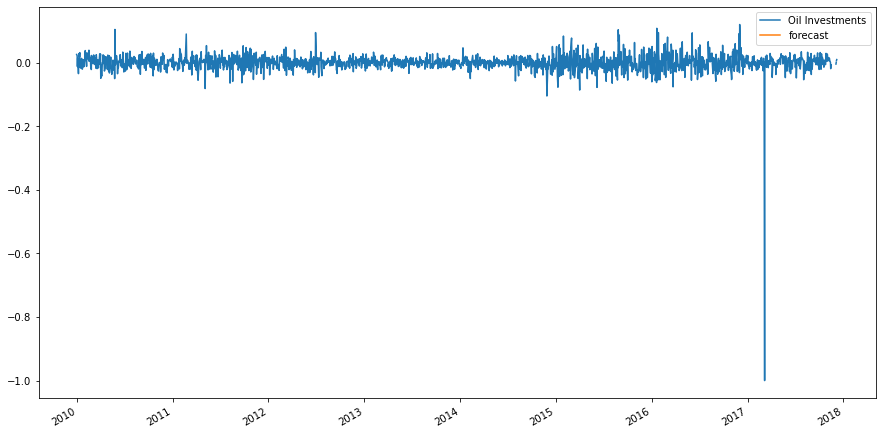

In [58]:
future_df[['Oil Investments', 'forecast']].plot(figsize=(15, 8))

In [59]:
#forecast line(orange) not visible at all as all values are null because there was no prediction
#In x-axis(index) the index is not going till final index value of  "2020-11-13".its stopping at 2018 which i had earlier in starting df.
#The concated "future_df" index also not visible till end.